# Filters in pycoco

---------------------

## Introduction

This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting filters in `pycoco`, as a companion to the `c` code `CoCo`


In [1]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os

import pycoco as pcc

reload(pcc) ## FOR DEV


<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

## Using `FilterClass`

### `FilterClass` Methods and Variables

Filters in **`pycoco`** are handled using a **`FilterClass()`**, which has the methods:

**`FilterClass.__init__()`**

**`FilterClass.read_filter_file()`** 

**`FilterClass.calculate_effective_wavelength()`**

**`FilterClass.calculate_edges()`** 

**`FilterClass.plot()`**

**`FilterClass.resample_response()`**

**`FilterClass.calculate_plot_colour()`**


and variables:

**`FilterClass._wavelength_units`**

**`FilterClass._filter_file_path`**

**`FilterClass._upper_edge`**

**`FilterClass._lower_edge`**

**`FilterClass.lambda_effective`**

**`FilterClass.wavelength`**

**`FilterClass.throughput`**


### Loading a Filter

We can use **`pcc.load_filter()`** to intialise a FilterClass instance and load in a response function given a valid path to that filter.
**`pcc.load_filter()`** is essentially a wrapper for the class methods: **read_filter_file()**, **calculate_effective_wavelength()** and **calculate_plot_colour()**.

In [8]:
verbose = True

if "PYCOCO_FILTER_DIR" not in os.environ:
    filter_dir = "/Users/berto/Code/CoCo/data/filters/"
else:
    filter_dir = os.environ["PYCOCO_FILTER_DIR"]
    
filter_filename = "B.dat"
filter_filename = "R.dat"


path_to_filter = os.path.join(os.path.abspath(filter_dir), filter_filename)

if verbose: print("Path to the filter: ", path_to_filter)

Path to the filter:  /Users/berto/Code/CoCo/data/filters/R.dat


In [9]:
B = pcc.load_filter(path = path_to_filter)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


Now we can check that everything has been loaded in automatically.

In [10]:
B.__dict__

{'_filter_file_path': '/Users/berto/Code/CoCo/data/filters/R.dat',
 '_lower_edge': 5500.0,
 '_plot_colour': (0.99381399999999998,
  0.70474099999999995,
  0.18304300000000001,
  1.0),
 '_upper_edge': 9000.0,
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'R',
 'lambda_effective': <Quantity 6416.118067978533 Angstrom>,
 'throughput': array([ 0.  ,  0.23,  0.74,  0.91,  0.98,  1.  ,  0.98,  0.96,  0.93,
         0.9 ,  0.86,  0.81,  0.78,  0.72,  0.67,  0.61,  0.56,  0.51,
         0.46,  0.4 ,  0.35,  0.14,  0.03,  0.  ]),
 'wavelength': array([ 5500.,  5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,
         6300.,  6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,
         7100.,  7200.,  7300.,  7400.,  7500.,  8000.,  8500.,  9000.]),
 'wavelength_u': <Quantity [ 5500., 5600., 5700., 5800., 5900., 6000., 6100., 6200., 6300.,
             6400., 6500., 6600., 6700., 6800., 6900., 7000., 7100., 7200.,
             7300., 7400., 7500., 8000., 8500., 9000.] Angstrom

Looks good! But we can always check by plotting.

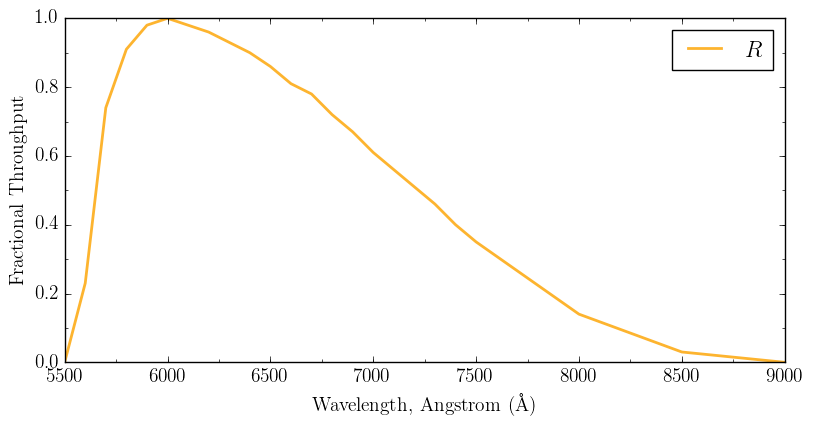

In [11]:
B.plot()

If the effective wavelength of the filter has been calculated, then a colour can be picked from a colourmap. This will come in handy for datasets with more than a few filters. This can be done using **`FilterClass.calculate_plot_colour(...)`**

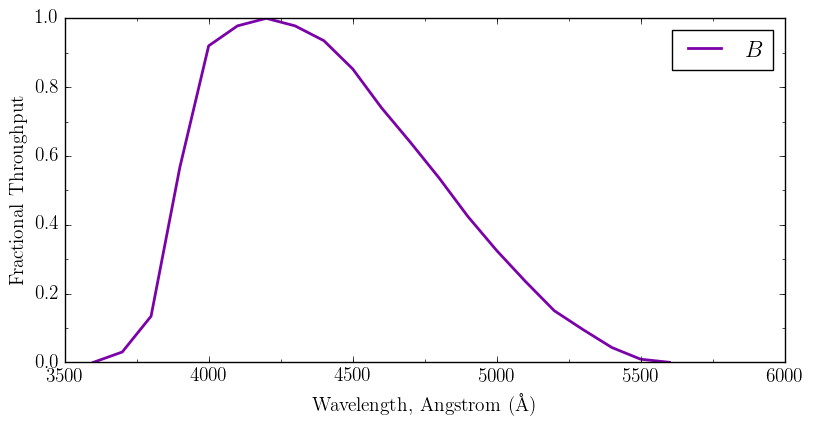

In [6]:
B.calculate_plot_colour()
B.plot()

You can also show the edges of the filter by passing `show_lims = True`. This uses the edges as defined by **`FilterClass.calculate_edges()`** and stored in **`FilterClass._upper_edge`** and
**`FilterClass._lower_edge`**

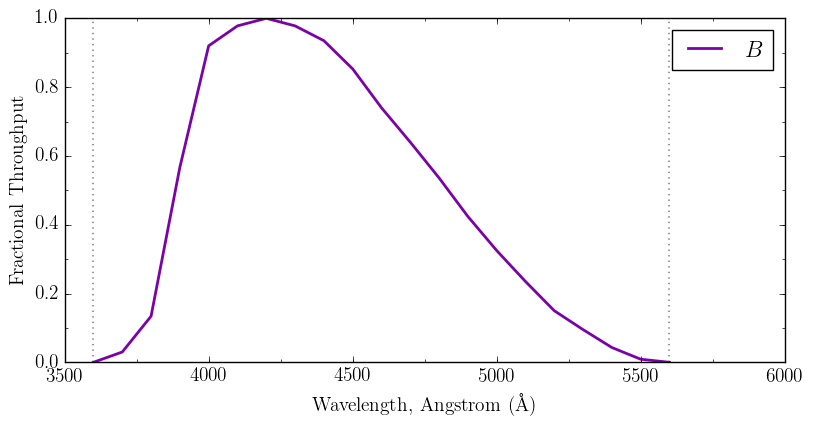

In [7]:
B.plot(show_lims = True)